In [1]:
# multidimensional arrays
import numpy as np

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

#benchmarking
import time

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Return to the origin


For a *finite* random walk of (large) length $n$, it is known that the expected number of returns to the origin $T_n$ scales like follows:
$$
\left\langle T_n \right\rangle \sim \left\{
\begin{array}{ll}
\sqrt{n} & d=1 \\
\log(n) & d=2 \\
C_d & d\geq 3
\end{array}
\right.
$$


<img src="attachment:image.png" width="600">

Notice that for $d \geq 3$, $\left\langle T_n \right\rangle$ does **not** grow with $n$, which must mean that the walker somehow "escapes" and never returns back to the origin. The probability of return to the origin is less than 1! For an infinite-length random walk, indeed the probability of returning to the origin $\rho$ is seen to be

$$
\rho \sim \left\{
\begin{array}{ll}
1 & d=1 \\
1 & d=2 \\
<1 & d\geq 3
\end{array}
\right.
$$

The *intuitive* explanation of this amazing fact is that, as the dimension $d$ grows, there are "more directions available", and so more chances for the walker to "get lost" and never return to the origin. There is of course a formal proof as well, but today we will do a **computational verification** of these facts, which is no substitute for a formal proof but is often all we can do!

## Generating Random Walks


### Exercise 3.1
Write a function that generates a random walk of given length in $d$ dimensions. Your random walker should move as follows:

+ At each time-step, the walker moves only in one direction.
+ At each time-step, the walker moves only by -1 or +1

Your function should return a numpy array of shape (`length`, `dim`). Example:
```python
>>> # create a RW of length 10 in dimension 3
>>> traj = get_traj(length=10, dim=3)
>>> # check that the output has the right shape
>>> traj.shape
(10, 3)
```

In [2]:
def get_traj(length=100, dim=2):
    """Generate a RW in d dimensions
    
    Parameters
    ----------
    length: int
        Length of the RW.
    dim: int
        Dimension of the RW


    Returns
    -------
    traj : np.ndarray, (length, dim)
        The positions of the RW.
    
    Notes
    -----
    At each time-step, the walker moves in only one direction.
    At each time-step, the walker moves by -1 or +1
    """
    traj = np.ndarray (shape = (length, dim),dtype=int)
    for step in range (length):
    
        if step == 0:
            traj [0,:] = np.zeros(dim)
        else:
            traj[step,:] = traj[step-1,:] + new_step_RW(dim=dim)
    return traj
def new_step_RW(dim : int):
    """ Generate a new step for the RW
    
    Parameters
    ----------
    dim: int
        Dimension of the RW
    Returns
    -------
    step_RW : np.array, (dim)
        the next step of the walker 
        e.g. dim = 3,
        new_step_RW = [0,-1,0],
        it means the walker moved of -1 in dimensione 2
    
    """
                
    assert dim >0
    dim_of_step = np.random.randint(dim)
    new_step_RW = np.array([np.random.choice([1,-1]) if  x == dim_of_step else 0 for x in range(dim)])
    return new_step_RW

### Verification
To make sure that your function works correctly, execute the following cell. Notice the use of `assert` statements: execution should fail if something goes wrong. If everything is fine, nothing should happen.

In [3]:
# basic checks for your RW generator
for dim in range(1, 5):
    for length in [10, 100, 200, 500]:
        traj = get_traj(length=length, dim=dim)
        # make sure traj has the right shape
        assert traj.shape == (length, dim)
        # make sure all steps are -1 or 1 in only one direction
        assert np.all(np.sum(np.diff(traj, axis=0) != 0, axis=1) == np.ones(length - 1))

### Exercise 3.2
Plot a random walk of length $10^4$ for $d=1$ (time in x-axis, position in y-axis) and $d=2$ (x,y components in x,y-axis). Remember to use **axis labels**.

In [4]:
# it is better if you use one cell to generate the random walks, and a second cell to plot them
length = 10**4;
RW_1d = get_traj(length=length,dim=1)
RW_2d = get_traj(length=length,dim=2)

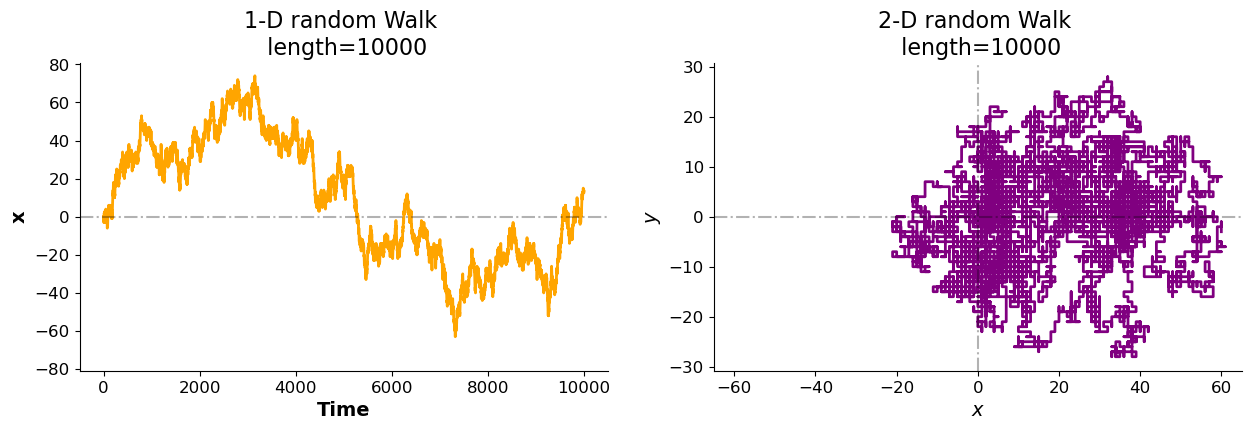

In [5]:
# We generate a figure with two subplots, called axis in matplotlib.
#
# To use the left subplot, we do
# ax1.plot(...)
#
# while to use the right subplot, we do
# ax2.plot(..)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

def symmetrize_y_axis(axes):
    """symmetrize y axes in order to have 0 in the center"""
    y_max = np.abs(axes.get_ylim()).max()
    axes.set_ylim(ymin=-y_max, ymax=y_max)
def symmetrize_x_axis(axes):
    """symmetrize x axes in order to have 0 in the center"""
    x_max = np.abs(axes.get_xlim()).max()
    axes.set_xlim(xmin=-x_max, xmax=x_max)
    
    
"""plot 1d"""
ax1.plot(RW_1d,
         color = "orange",
         lw=2,
        );
#origin axis
ax1.axhline(y=0, c="black",linestyle = '-.',alpha=.3)

#symmetriza y-axis
symmetrize_y_axis(ax1)

# add title
ax1.set_title(f"1-D random Walk \n length={length}");

# add labels for axes
ax1.set_xlabel(r"Time",fontweight='bold');
ax1.set_ylabel(r"x",fontweight='bold');

# #plotting 10 elements
# ax1.plot(np.linspace(0,9000,10,dtype=int),
#          RW_1d[np.linspace(0,9000,10,dtype=int)],
#          color="r",
#          marker = 'o',
#          ms=8,
#          linestyle='',
#          label = '$\Delta Nstep = 1000$'
         
# )
# ax1.legend()



"""plot 2d"""
ax2.plot(RW_2d[:,0],RW_2d[:,1],
         color = "purple",
         lw=2
        );
#origin axis
ax2.axhline(y=0, c="black", linestyle = '-.',alpha=.3)
ax2.axvline(x=0, c="black", linestyle = '-.',alpha=.3)

#symmetriza axes
symmetrize_x_axis(ax2)
symmetrize_y_axis(ax2)

# add title
ax2.set_title(f"2-D random Walk \n length={length}");
# add labels for axes
ax2.set_xlabel(r"$x$",fontweight='bold');
ax2.set_ylabel(r"$y$",fontweight='bold');

#plotting 10 elements
# ax2.plot(RW_2d[np.linspace(0,9000,10,dtype=int),0],
#          RW_2d[np.linspace(0,9000,10,dtype=int),1],
#          color="r",
#          marker = 'o',
#          ms=8,
#          linestyle='',
#          label = '$\Delta Nstep = 1000$'
         
# );
# ax2.legend();


## Counting the number of returns to the origin
Since we are interested in how **the expected number of returns to the origin** scales with the RW length, we don't need to store the whole trajectory of each simulation (we will be performing many simulations!). 

### Exercise 3.3
Write a function that generates a RW of given length and dimension (calling `get_traj`), and returns the number of times it returned to the origin. To count the number of returns to the origin, you might need to use the following functions:
```python
np.all()
np.zeros()
```

In [6]:
def get_num_returns(length, dim):
    # generate a RW of given length and dimension
    traj = get_traj(length=length,dim=dim)
    # count how many times it goes through the origin
    
    """The RW is in the origin if all the elements of a row are equal to 0.
    To get the number of returns to the origin we count the rows with all 0 value,
    hence the total number of steps - the # of the rows which are non equal to 0. This is obtained thanks to any() method
    """
    
    num_returns_to_origin = length - np.sum(traj.any(axis=1))

    #due to how the RW was created it always has the first row equal to 0, in order not to count it as a 'return' we substract it
    num_returns_to_origin -= 1
    
    return num_returns_to_origin

### Exercise 3.4
Write a function that computes the expected number of returns to the origin for a given length and dimension. Your function will call `get_num_returns()`, and should have an additional parameter that sets the sample size.

In [7]:
def get_average_num_returns(length, dim, num_trajs=200):
    
    average_num_returns = np.sum(np.array([
        get_num_returns(length=length,dim=dim) 
        for _ in range(num_trajs)])) /num_trajs
    return average_num_returns

## Comparing with analytical results
We are now ready to compare our analytical results with numerical simulations! We want to plot the expected number of returns to the origin as a function of the RW length. To do this, it is useful to first define an array of RW lengths.

In [8]:
# define range of RW lengths
length_min = 1
length_max = 100000
#length_max = 100000
# generate points logarithmically spaces
# and convert them to integers
length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=20)
])

(tip: if your RW generating function is not very efficient, you might want to decrease `length_min`)  

Executing the following cell will run all simulations for $d=1$


In [9]:
%%time
dim=1

num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim,num_trajs=200)
    for length in length_array
])

CPU times: user 7min, sys: 7.16 s, total: 7min 7s
Wall time: 6min 59s


### Exercise 3.5
Plot the average number of returns to the origin of a 1D RW as a function of the RW length, together with the expected theoretical result. Do your results verify the $n^{1/2}$ scaling? **Tip** Use double-logarithmic scales in your plot. Remember to include label axis, and a legend!

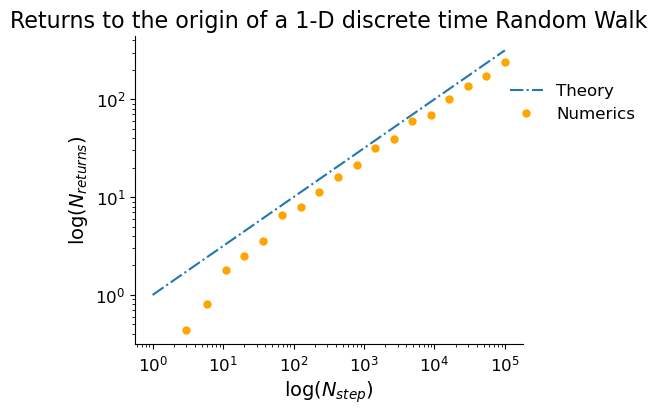

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# plot theoretical result 
#N_returns is approximately the square root of the # of steps
ax.loglog(length_array,
          np.sqrt(length_array),
          linestyle='dashdot',
          label="Theory")

# plot numerical result
ax.loglog(length_array,
            num_returns_array,
            color="orange",
            marker = 'o',
            ms=5,
            linestyle='',
            label="Numerics")

# a axis labels
ax.set_xlabel("log($N_{step}$)")
ax.set_ylabel("log($N_{returns}$)")
# add a legend
ax.legend(loc=(0.95, 0.7), frameon=False)

# add a title (e.g. that says what dimension we used)
ax.set_title(f"Returns to the origin of a {dim}-D discrete time Random Walk");

### Exercise 3.6
Plot the average number of returns to the origin of a 2D RW as a function of the RW length. Do your results verify the $log(n)$ scaling? What are the best axis scales to use in this case?

In [11]:

# define range of RW lengths
length_min = 1
length_max = 1000
#length_max = 100000
# generate points logarithmically spaces
# and convert them to integers
length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=20)
])

In [12]:
dim=2
#keeping track of time of execution
start = time.time()
#obtaining the averages
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim, num_trajs=100)
    for length in length_array
])

end = time.time()
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) , "s")

The time of execution of above program is : 3.239475727081299 s


## Plot 2-D RW
The plot is linear(y axis)-log(x axis)  in order to have a better presentation of the data due to the esiguous number of returns 

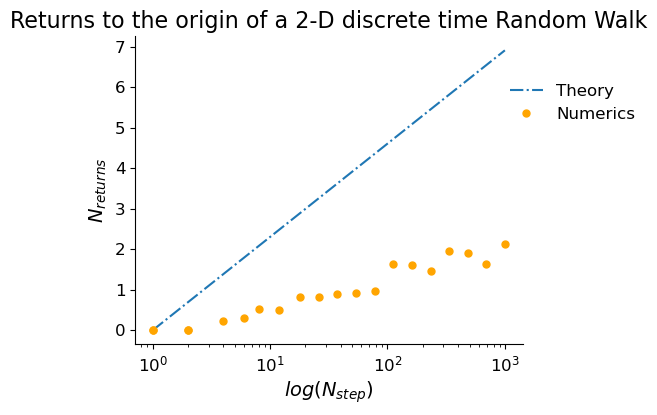

In [13]:
# plot the numerical results + theory
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# plot theoretical result 
#N_returns is approximately the square root of the # of steps
ax.set_xscale('log')
ax.plot(length_array,
            np.log(length_array),
            linestyle='dashdot',
            label="Theory")

# plot numerical result
ax.plot(length_array,
            num_returns_array,
            color="orange",
            marker = 'o',
            ms=5,
            linestyle='',
            label="Numerics")

# add axis labels
ax.set_xlabel("$log(N_{step}$)")
ax.set_ylabel("$N_{returns}$")
# add a legend
ax.legend(loc=(0.95, 0.7), frameon=False)

# add a title (e.g. that says what dimension we used)
ax.set_title(f"Returns to the origin of a {dim}-D discrete time Random Walk");

### E' evidente come la simulazione non scali esattamente come $log n$
E'altrettanto evidente come l'andamento sia comunque lineare (n.b. logaritmico visto l'asse delle ascisse), 
mediante una regressione è possibile ottenere tale inclinazione.

# REGRESSIONE

Faccio una regressione tra i miei risultati e il logaritmo della lunghezza del RW per trovare il giusto coefficiente

In [14]:
from sklearn.linear_model import LinearRegression

log_reg = LinearRegression().fit(np.log(length_array).reshape(-1, 1),num_returns_array)


r_sq = log_reg.score(np.log(length_array).reshape(-1, 1),num_returns_array)

print(f"coefficient of determination: {r_sq}")

intercept = log_reg.intercept_
print(f"intercept: {intercept}")

coef = log_reg.coef_
print(f"slope: {coef}")

coefficient of determination: 0.9511055947987608
intercept: -0.15925586092043686
slope: [0.31713507]


In [15]:
n_returns_predicted = coef * np.log(length_array) + intercept

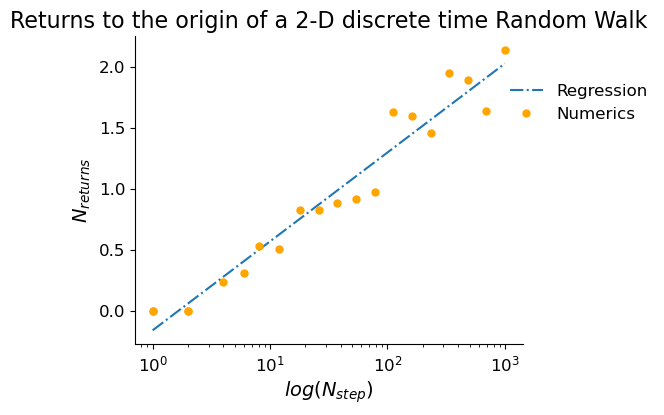

In [16]:
# plot the numerical results + theory
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# plot theoretical result 
#N_returns is approximately the square root of the # of steps
ax.set_xscale('log')
ax.plot(length_array,
            n_returns_predicted,
            linestyle='dashdot',
            label="Regression")

# plot numerical result
ax.plot(length_array,
            num_returns_array,
            color="orange",
            marker = 'o',
            ms=5,
            linestyle='',
            label="Numerics")

# add axis labels
ax.set_xlabel("$log(N_{step}$)")
ax.set_ylabel("$N_{returns}$")
# add a legend
ax.legend(loc=(0.95, 0.7), frameon=False)

# add a title (e.g. that says what dimension we used)
ax.set_title(f"Returns to the origin of a {dim}-D discrete time Random Walk");

### Sembra crescere come $\frac{log(n)}{3}$

### Exercise 3.7
Show numerically that, for $d=3$ and $d=4$, the expected number of returns to the origin is **constant**.

In [17]:
# your numerical answer here
# you can use more than one cell of course!
# use markdown cells and code cells if necessary

In [18]:

# define range of RW lengths
length_min = 1
length_max = 10000
#length_max = 100000
# generate points logarithmically spaces
# and convert them to integers
length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=20)
])

# 3D

In [19]:
%%time
dim=3
#200 trajs to average are maybe too much for my poor CPU
num_returns_array_3D = np.array([
    get_average_num_returns(length=length, dim=dim,num_trajs=50)
    for length in length_array
])

CPU times: user 12.2 s, sys: 128 ms, total: 12.3 s
Wall time: 12.2 s


# 4D

In [20]:
start = time.time()

In [21]:
dim=4
#200 trajs to average are maybe too much for my poor CPU
num_returns_array_4D = np.array([
    get_average_num_returns(length=length, dim=dim,num_trajs=50)
    for length in length_array
])

In [22]:
end = time.time()
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start), "s /n",
     (end-start)/60,"min")

The time of execution of above program is : 12.296542167663574 s /n 0.20494236946105956 min


In [23]:
start = time.time()

In [24]:
dim=4
#200 trajs to average are maybe too much for my poor CPU
num_returns_array_4D = np.array([
    get_average_num_returns(length=length, dim=dim,num_trajs=50)
    for length in length_array
])

In [25]:
end = time.time()
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start), "s /n",
     (end-start)/60,"min")

The time of execution of above program is : 12.465999841690063 s /n 0.20776666402816774 min


## Plot 3/4-D RW
The plot is linear(y axis)-log(x axis)  in order to have a better presentation of the data due to the esiguous number of returns 

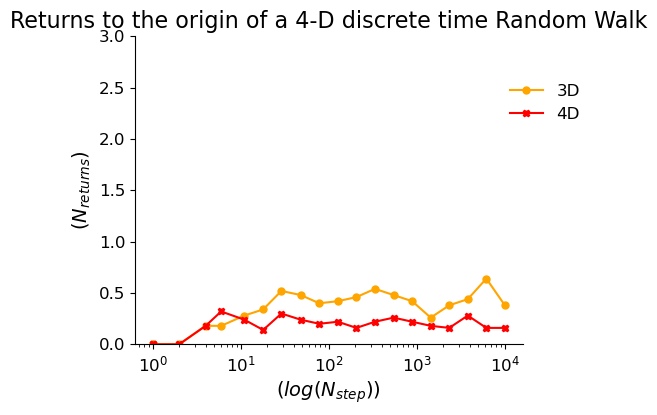

In [26]:
# plot the numerical results + theory
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# plot theoretical result 
#N_returns is approximately the square root of the # of steps
ax.set_xscale('log')
ax.plot(length_array,
            num_returns_array_3D,
            color="orange",
            marker = 'o',
            ms=5,
            linestyle='-',
            label="3D")

# plot numerical result
ax.plot(length_array,
            num_returns_array_4D,
            color="red",
            marker = 'X',
            ms=5,
            linestyle='-',
            label="4D")

ax.set_ylim([0,3])
# add axis labels
ax.set_xlabel("($log(N_{step})$)")
ax.set_ylabel("$(N_{returns})$")
# add a legend
ax.legend(loc=(0.95, 0.7), frameon=False)

# add a title (e.g. that says what dimension we used)
ax.set_title(f"Returns to the origin of a {dim}-D discrete time Random Walk");

# Self-Avoiding Walks
Self-avoiding walks (SAW) are simply random walks in a regular lattice with the additional constraint that no point can be visited more than once. That is, SAWs cannot intersect themselves. The most well-known application of SAW is to model linear polymers, where obviously two monomers cannot occupy the same space (excluded volume effect).


You can read more about self-avoiding walks in this nice introduction by Gordon Slade:

[Self-Avoiding Walks, by Gordon Slade](https://www.math.ubc.ca/~slade/intelligencer.pdf)

## Simulating Self-Avoiding Walks
Generating a SAW is not trivial. If you try to generate a SAW stochastically, that is, one step at a time, you will miserably fail: your walker might get into traps (configurations with no allowed movements), and if it does you will have to discard your simulation. It turns out you will have to discard your simulation *really* often, so that for large lengths, you will basically never find a valid path. In addition, the paths you will find for short lengths will not come up with the right probabilities. Bear in mind that we want to **uniformly sample** the set of SAW of given length $n$, SAW($n$). That is, we want that all paths from SAW($n$) are generated with the same probability.

The solution is to use a Monte Carlo algorithm that, given one element $\alpha \in \text{SAW}(n)$, generates a new one $\beta \in \text{SAW}(n)$ with some probability $P_{\alpha \beta}$. If in addition our algorithm satisfies **detailed balance** and is **ergodic**, then we known that it will converge to the equilibrium distribution (the uniform distribution in our case).


## The pivot algorithm
We will implement the pivot algorithm, which is simple, effective, and satisfies detailed balance and ergodicity. You can read about the details of the pivot algorithm here:

[The Pivot Algorithm: A Highly Efficient Monte Carlo Method for the Self-Avoiding Walk](https://link.springer.com/article/10.1007/BF01022990)

(tip: if you're at home, **do not** use tools such as sci-hub to download the paper).

Given a self-avoiding walk of length $n$, the pivot algorithm generates the next walk $\beta \in \text{SAW}(n)$ as follows:

1. **Choose a point of $\alpha$ at random**, splitting the path in two bits: the head (from the origin to the chosen point) and the tail (from the chosen point to the end of the path). Notice that both the head and the tail are SAWs.
2. **Apply a transformation to the tail**, leaving the head intact. The transformation must be an orthoganl transformation that leaves the regular lattice intact (so, either a reflection or a $90º, 180º$ or $270º$ rotation). For simplicity, we will use only **rotations** (read the paper to see why this is ok).
3. **Check if the new path is self-avoiding**. If so, return it. Otherwise, return the original path.

Iterating these steps one obtains a **Markov** chain of SAWs: $\alpha_1 \to \alpha_2 \to \dots \to \alpha_M $. Notice that $\alpha_i$ are not uncorrelated, but because the algorithm satisfies detailed balance and is ergodic, we know that it approaches the equilibrium distribution. This means that we can use our Markov chain to compute **expected values** as long as it is long enough.

## Implementing the pivot step in 2D
To implement the **pivot algorithm** in 2D, we will write one function that does steps 1 and 2, and another function that does step 3. We will also need a function to generate standard 2D random walks.

### Exercise 3.8
Write a function `get_traj` that generates a 2D random walk of given length.

In [27]:
#actually I have already done it at the beginning, I'm gonna use that one (it has dim=2 as a basic assignation)
def get_traj_2d(length):
    """Generate a 2D random walk of given length"""
    
    def new_step_RW(dim : int):
        """ Generate a new step for the RW

        Parameters
        ----------
        dim: int
            Dimension of the RW
        Returns
        -------
        step_RW : np.array, (dim)
            the next step of the walker 
            e.g. dim = 3,
            new_step_RW = [0,-1,0],
            it means the walker moved of -1 in dimensione 2

        """

        assert dim >0
        dim_of_step = np.random.randint(dim)
        new_step_RW = np.array([np.random.choice([1,-1]) if  x == dim_of_step else 0 for x in range(dim)])
        return new_step_RW
    
    dim = 2 
    traj = np.ndarray (shape = (length, dim),dtype=int)
    for step in range (length):
    
        if step == 0:
            traj [0,:] = np.zeros(dim)
        else:
            traj[step,:] = traj[step-1,:] + new_step_RW(dim=dim)
    return traj



### Exercise 3.9
Write a function `pivot_traj` that, given a 2D random walk, performs steps 1 and 2 of the pivot algorithm. Some useful functions:
```python
np.random.randint()
np.concatenate()
```
You might also want to multiply matrices using the `@` operator:
```python
>>> a = np.array([[1, 2], [3, 4], [5, 6]])
>>> b = np.array([1, 1])
>>> a @ b
array([ 3,  7, 11])
```


In [28]:
def pivot_traj(traj):
    """Apply a random rotation to part of a RW."""
    
    # choose the pivot
    #choosing any step of the random walk
    pivot_index = np.random.randint(low=0,high=np.size(traj,axis=0))
    
    #adding here the selection of both columns
    pivot_point = traj[pivot_index,:]

    # split head and tail
    traj_head = traj[:pivot_index,:]
    traj_tail = traj[pivot_index:,:]
    
    # define the rotation matrices
    #generic rotation matrix = ([[cos th ,-sen th ], [sen th , cos th]]),
    symmetries = [
        # 90 deg rotation
        np.array([[0 ,-1 ], [1 ,0 ]]),
        # 180 deg rotation
        np.array([[-1 ,0 ], [0 ,-1 ]]),
        # 270 deg rotation
        np.array([[0 ,1 ], [-1 ,0 ]]),
    ]
    
    # choose one rotation at random
    symmetry = symmetries[np.random.randint(low=0,high=3)]
    #print(symmetry)
    # apply the transformation to the tail
    #I first center it and then rotate it
    new_tail = ((traj_tail - pivot_point) @ symmetry) + pivot_point
    
    # join the old head with the new tail
    new_traj = np.concatenate((traj_head,new_tail))
    
    return new_traj


### Exercise 3.10
Write a function that counts the number of self-intersections of a RW. Notice that SAWs have 0 self intersections, so that will solve step 3 of the pivot algorithm, but will also be useful to generate the initial condition. One way of approaching this exercise is to count how many *different* points the path visits.

In [29]:
def count_self_intersections(traj):
    """Count the number of self-intersections of a RW"""
    #different points path visited
    n_points_visited = np.size(np.unique(traj,axis=0),axis=0)
    #number of steps of the RW
    n_steps_traj = np.size(traj,axis=0)
    # the # of self intersection is simply given by: N_made - N_visited
    num_self_intersections = n_steps_traj - n_points_visited
    return num_self_intersections

In [30]:
#Thanks to Emilio Annoni for the advice of using set()
def count_self_intersections(traj):
    """Count the number of self-intersections of a RW"""
    point_set = set()

    n_steps_traj = traj.shape[0]

    for i in range(n_steps_traj):
        point_set.add(tuple(traj[i,:]))

    #number of steps of the RW
    n_points_visited = len(point_set)
    # the # of self intersection is simply given by: N_made - N_visited
    num_self_intersections = n_steps_traj - n_points_visited
    return num_self_intersections

### Exercise 3.11
Verify that your `count_self_intersecitons` function works properly by using short trajectories for which you know the answer.

In [31]:
# your verifications here
#testing it against small RW that i can control by just looking at them... Not sure it's the best
#maybe by plotting them I can test it better, but I am too curious to see how everything works together
for _ in range(6):
    traj = get_traj (length = 4)
    n_intersection = count_self_intersections(traj)
    print("la traiettorie è \n", traj, "\n Il numero delle intersezioni calcolato è: ",n_intersection)


la traiettorie è 
 [[ 0  0]
 [ 0 -1]
 [ 1 -1]
 [ 0 -1]] 
 Il numero delle intersezioni calcolato è:  1
la traiettorie è 
 [[ 0  0]
 [ 0 -1]
 [ 0  0]
 [ 0 -1]] 
 Il numero delle intersezioni calcolato è:  2
la traiettorie è 
 [[ 0  0]
 [ 0  1]
 [-1  1]
 [-1  2]] 
 Il numero delle intersezioni calcolato è:  0
la traiettorie è 
 [[0 0]
 [0 1]
 [1 1]
 [2 1]] 
 Il numero delle intersezioni calcolato è:  0
la traiettorie è 
 [[ 0  0]
 [ 0 -1]
 [ 0 -2]
 [-1 -2]] 
 Il numero delle intersezioni calcolato è:  0
la traiettorie è 
 [[ 0  0]
 [-1  0]
 [-1  1]
 [-1  2]] 
 Il numero delle intersezioni calcolato è:  0


## sembra lavorare in modo dignitoso

## Generating the initial condition
You might have noticed that the pivot algorithm requires an element of SAW($n$) as starting condition, to then generate a Markov chain easily. But how do you get this first element? We will use the following strategy:
1. Generate a standard 2D random walk, and count the number of self intersections.
2. Apply the pivot transformation to get a new 2D random walk, and count the number of self-intersections-
3. If the number of self-intersections has decreased or not changed, keep the new path. Else, keep the old one.
4. Go to 2, till the number of self-intersections is 0.

### Exercise 3.12
Write a function `get_first_SAW` that generates a SAW of given length

In [32]:
#probably it is faster like this but this function needs recursion...
def get_first_SAW(length, max_tries=1000000,debug = False):
    traj = get_traj(length)
    n_intersection = count_self_intersections(traj)
    n_intersection_ref = n_intersection
#     print(traj)
    n_tries = 0;
    while n_intersection > 0:
        n_tries +=1
        new_traj = pivot_traj(traj)
        n_intersection = count_self_intersections(new_traj)
#         if np.mod(ii,100) ==0:
#             print ('intersection number: \t',n_intersection, '\n and traj is \n', new_traj)
#         if new intersection number has improved we change path and change our reference # with the new one
        if n_intersection <= n_intersection_ref:
            if debug and n_intersection < n_intersection_ref:
                print(n_intersection,'\t left to unravel')
            n_intersection_ref = n_intersection
            traj = new_traj
            
        #se arriviamo al massimo dei tentativi riproviamo con un nuovo SAW    
        if n_tries == max_tries:
            print('Sorry, Too many tries, i am gonna start all over again ')
            return get_first_SAW(length)
            
    #print ('HA RICHIESTO SOLO:\t', ii, 'ITERAZIONI')
    return traj

### Exercise 3.13
Generate and plot some 2D SAWs of different lengths. Be carefull, raise the length slowly! You can measure how long a cell takes executing using the `%%time` magic at the top of a cell.

In [33]:
# your answer here
# use more than one cell!

## Benchmarking the dimension of a feasible SAW_RW

CPU times: user 1h 27min 53s, sys: 251 ms, total: 1h 27min 54s
Wall time: 1h 27min 53s


Text(0, 0.5, '$y$')

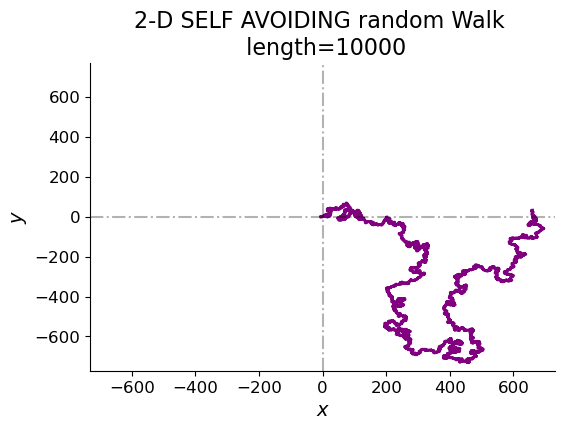

In [34]:
%%time
# define thelength
length = 10000

SAW_RW = get_first_SAW(length,debug=False)

# print the difference between start
# and end time in milli. secs
#print("The time of execution of above program is :",
#       (end-start), "s /n",
#      (end-start)/60,"min")

"""plot 2d"""
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(SAW_RW[:,0],SAW_RW[:,1],
         color = "purple",
         lw=2
        );
#origin axis
ax.axhline(y=0, c="black", linestyle = '-.',alpha=.3)
ax.axvline(x=0, c="black", linestyle = '-.',alpha=.3)

#symmetriza axes
symmetrize_x_axis(ax)
symmetrize_y_axis(ax)

# add title
ax.set_title(f"2-D SELF AVOIDING random Walk \n length={length}");
# add labels for axes
ax.set_xlabel(r"$x$",fontweight='bold');
ax.set_ylabel(r"$y$",fontweight='bold');

### Exercise 3.14
Write a function `get_next_SAW` that, given a SAW, generates another SAW using the pivot algorithm. Your function should check that the input RW is really a SAW. Remember the steps:

1. Apply the pivot transformation
2. Check if the new path is self-avoiding. **If so, return it. Otherwise, return the original path.**

In [35]:
def get_next_SAW(traj,test=False):
    # make sure input traj is SAW
    assert count_self_intersections(traj) == 0
    
    # pivot step
    proposed_traj = pivot_traj(traj)
    
    # count intersections
    num_intersections = count_self_intersections(proposed_traj)
    
    # if it's a SAW
    if num_intersections == 0:
        
        return proposed_traj
    
    #I was curious about the consequences
    elif test:
        return get_next_SAW(traj)
    
    # if not
    else:
        return traj

### Mean Squared Displacement in SAW
A quantity of interest in RWs is the mean squared displacement, which is simply the (squared) distance between the endpoints of the walk. Usually, one writes

$$
\left\langle X(n)^2 \right\rangle \sim n^{2 \nu}
$$

As you know, for a standard RW of $n$ steps, the mean-squared displacement scales like $n$, so $\nu=1/2$. However, the exponent for SAW is **different**! Althought it has not been formally proven (still), it is believed that the exponent for SAW is $\nu=3/4$. That is, for a self-avoiding random walk, the mean squared displacement scales as $n^{3/2}$.

### Exercise 3.15
Explain why it makes sense that the mean-squared displacement exponent of SAW is **greater** than that of standard RW. 

Dal momento che un SAW non può ritornare dove è già passato avrà una bassa probabilità di ritornare nei dintorni dell'origine (zona da cui proviene) e tenderà invece ad allontanarsi.
Per spiegarmi meglio:
Se consideriamo una circonferenza di raggio $r = n$, il numero dei nodi all'interno di una corona circolare infinitesima compresa tra $r=r_0$ e $r' = r_0 + \Delta n$ sarà proporzionale all'area di tale circonferenza, ovvero proporzionale a 

$2\pi r_0$

Si ha dunque che, considerando l'equiprobabilità di tutti i SAW, si tenderà in media a riempire un cerchio di raggio via via maggiore rimbalzando all'esterno ogni qual volta si arriverà ai suoi confini, mentre nel caso di un normale RW il walker potrebbe riattraversarlo liberamente


### Exercise 3.16
Verify numerically the scaling of the mean-squared displacement of SAW. Notice that you don't need to store all the SAWs, just the endpoints. You could follow this scheme:

1. Generate a first SAW with your `get_first_SAW()` function
2. Generate the next SAW using your `get_next_SAW()` function, and store the endpoint.
3. Iterate step 2 for as many steps as required
4. Compute the average mean-squared displacement of the stored endpoints

Then repeating steps 1-4 for different lengths, and plot the results in double-logarithmic axis. Compare your results with the theoretical exponent. Do they agree?

In [36]:
def variance_SAW (length, n_SAW = 100,debug = False): 
    """ Compute the varianca of 2-D SAW of given length

        Parameters
        ----------
        length: # of steps of the SARW
        n_SAW : # of different SAW to use to calculate the variance
        
        Returns
        -------
        variance_SAW : Mean Squared value of SARW of length = length averaging n_SAW walks
    """
    start = time.time()
    print('Calculating MS of SAW of Len:\t',length)
    SAW = get_first_SAW(length,debug=False)
    end_point_squared = 0 
    for _ in range(n_SAW):
        SAW = get_next_SAW(SAW,test=False)
        end_point_squared += np.sum(SAW[-1,:]**2)
    
    end = time.time()
    if debug:
        print("The time of execution of above program is :",
            (end-start), "s \n",
         (end-start)/60,"min")
    return end_point_squared/n_SAW


In [37]:
#length_array = np.arange(1,25)
# define range of RW lengths
length_min = 1
length_max = 10**4
# generate points logarithmically spaces
# and convert them to integers
length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=20)
])
variance_vec = [variance_SAW(length,n_SAW=10000,debug=False) for length in length_array]


Calculating MS of SAW of Len:	 1
Calculating MS of SAW of Len:	 1
Calculating MS of SAW of Len:	 2
Calculating MS of SAW of Len:	 4
Calculating MS of SAW of Len:	 6
Calculating MS of SAW of Len:	 11
Calculating MS of SAW of Len:	 18
Calculating MS of SAW of Len:	 29
Calculating MS of SAW of Len:	 48
Calculating MS of SAW of Len:	 78
Calculating MS of SAW of Len:	 127
Calculating MS of SAW of Len:	 206
Calculating MS of SAW of Len:	 335
Calculating MS of SAW of Len:	 545
Calculating MS of SAW of Len:	 885
Calculating MS of SAW of Len:	 1438
Calculating MS of SAW of Len:	 2335
Calculating MS of SAW of Len:	 3792
Calculating MS of SAW of Len:	 6158
Calculating MS of SAW of Len:	 10000


## Plot Mean Squared of a SAW 

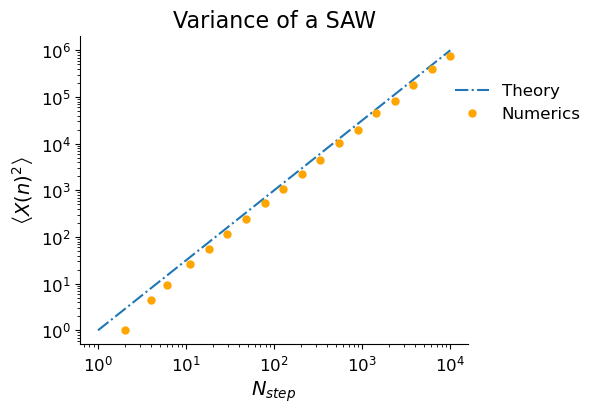

In [38]:
# plot the numerical results + theory
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# plot theoretical result 
#N_returns is approximately the square root of the # of steps
ax.loglog(length_array,
            np.power(length_array,3/2),
            linestyle='dashdot',
            label="Theory")

# plot numerical result
ax.loglog(length_array,
            variance_vec,
            color="orange",
            marker = 'o',
            ms=5,
            linestyle='',
            label="Numerics")
# add axis labels
ax.set_xlabel("$N_{step}$")
ax.set_ylabel(r"$ \left \langle X(n)^2 \right\rangle $")
# add a legend
ax.legend(loc=(0.95, 0.7), frameon=False)

# add a title
ax.set_title(f"Variance of a SAW");